<a href="https://colab.research.google.com/github/user8391/Deep-Learning-/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN with **Regression**

In [ ]:
# Import libraries

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
#from IPython import display
#display.set_matplotlib_formats('svg')

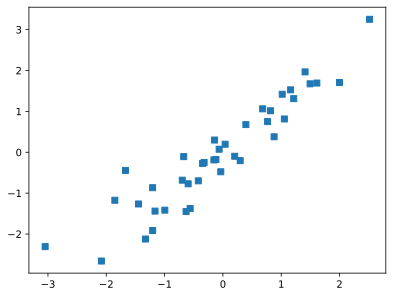

In [ ]:
# Creating data
N = 40
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

# Plot
plt.plot(x,y,'s')
plt.show()

In [ ]:
# Model Building


ANN_regression = nn.Sequential(
    nn.Linear(1,1), # Input Layer (creates a linear unit/ Neuron with linear fn with number if inputs 1-> x to the neuron and number of outputs 1->y in the bracket)
    nn.ReLU(), # Activation Function (Non Linear activation fn )
    nn.Linear(1,1) # Output Layer (output unit takes the output of input layer after it passing through ReLU as its input and returns final output)
)




In [ ]:
# Setting Meta Parameters

# Learning Rate
learning_rate = 0.05

# Loss Function
loss_function = nn.MSELoss() # Mean square error loss function

# Optimizer (The "Flavor" of gradient descent to implement)
optimizer = torch.optim.SGD(ANN_regression.parameters(), lr = learning_rate) # will be discussed later (Secastic gradient discent)

In [ ]:
# Training the Model (Pretty much the "Structure" of every training procedure ahead)

# Setting Epochs
numepochs = 500
losses = torch.zeros(numepochs) # to store losses


# Training -
for epochi in range(numepochs): # Number of iteration

  # Forward pass
  yHat = ANN_regression(x) # giving input -> predicting output

  # Computing loss
  loss = loss_function(yHat,y) # Computing losses using MSE
  losses[epochi] = loss # Storing losses for visualization

  # Back propogation (discussed later)
  optimizer.zero_grad() # We initialize all derivatives in the gradient to be zero
  loss.backward() # Implements back propogation
  optimizer.step() # Uses house keeping fns of optimizer for the SGD (grad descent) function


Model is Trained now

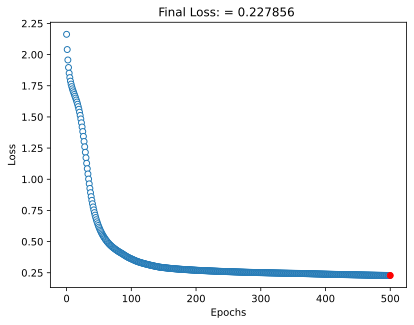

This is what we want to see usually 


In [ ]:
## Manually computing losses

# Final forward pass
predictions = ANN_regression(x)

# Final losses (Using MSE)
testloss = (predictions-y).pow(2).mean() # MSE after the training is finished

#--------------------------------------------

# Plotting
plt.plot(losses.detach(),'o',markerfacecolor='w', linewidth = .1) # Deeper discussions later to these plottings
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Final Loss: = %g " %testloss.item())
plt.show()
print("This is what we want to see usually ")

In [ ]:
print(testloss) # This loss is a tensor and has more info
# Attached to it other than the loss , the gradient function

# hence we use .detach() to seperate the number from other info inorder to visualize
testloss.detach() ,testloss.item() # .detach() Still stored as a tensor while .item() stores as number


tensor(0.2279, grad_fn=<MeanBackward0>)


(tensor(0.2279), 0.22785595059394836)

Loss functions tell about the loss , they do not tell how the model performs wrt data

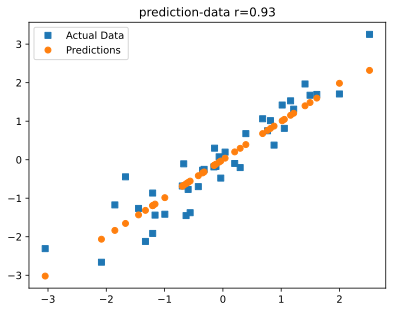

In [ ]:
# Plotting the data
plt.plot(x,y,'s',label = 'Actual Data')
plt.plot(x,predictions.detach(),'o',label = 'Predictions')
plt.title(f"prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}")
plt.legend()
plt.show()

# Code Challenge - Manipulate regression **Slope**

In [ ]:
# Import libraries

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
#from IPython import display
#display.set_matplotlib_formats('svg')

In [ ]:
# Create a fn to build,  train and outputs predictons and losses of the model


def model(inputs,actual_outputs):

  # Actual Data Points Visualization

  # plt.plot(inputs,actual_outputs,'s')
  # plt.show()

  # Model Building
  ANN_One = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
  )

  # Meta Parameters
  learning_rate = 0.01
  loss_function = nn.MSELoss() # Mean Square Error
  optimizer = torch.optim.SGD(ANN_One.parameters(), lr = learning_rate) # Gradient discent

  # Iterations - Epochs
  training_epochs = 300

  # Storing Losses
  losses = np.zeros(training_epochs)

  # Training
  for iteration in range(training_epochs):

      # Forward Pass
      predictions = ANN_One(inputs) # Prediction of model after each iteration

      # Loss
      loss = loss_function(predictions,actual_outputs) # Loss of model after each iteration
      losses[iteration] = loss.detach() # Storing Loss after each iteration

      # Back Propogation
      optimizer.zero_grad() # We initialize all derivatives in the gradient to be zero
      loss.backward() # Implements back propogation
      optimizer.step() # Uses house keeping fns of optimizer for the SGD (grad descent) function
  # --- Training Done ---

  # Outputs from the trained model
  final_predictions = ANN_One(inputs) # Final Predictions

  # Loss for final Prediction
  ## testloss = (final_predictions-actual_outputs).pow(2).mean() # Mean Squared Error (manual) after the training is finished

  return final_predictions,losses
  #--------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Write a function that creates Data and outputs x , y .
# x same as first representation , y = m*x + randn/2 , N = 50
# N -> Number of instances , m -> Slope

def data_gen(m,N=50):
  x = torch.randn(N,1)
  y = m*x + torch.randn(N,1)/2
  return x,y

Test **Once**

In [ ]:

# Slopes to simulate
slopes = np.linspace(-2,2,21)
expNums = 50

# Initializing Output matrix
results = np.zeros((len(slopes),expNums,2))

for slopeNum in range(len(slopes)):
  for expNum in range(expNums):
    # Creating Datasets
    x,y = data_gen(slopes[slopeNum])

    # Model Training and building
    predictions , losses = model(x,y)

    # Storing outputs
    results[slopeNum,expNum,0] = losses[-1]
    results[slopeNum,expNum,1] = np.corrcoef(y.T,predictions.detach().T)[0,1]

    # Correlation can be 0 if the model did not do well
    results[np.isnan(results)] = 0




/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


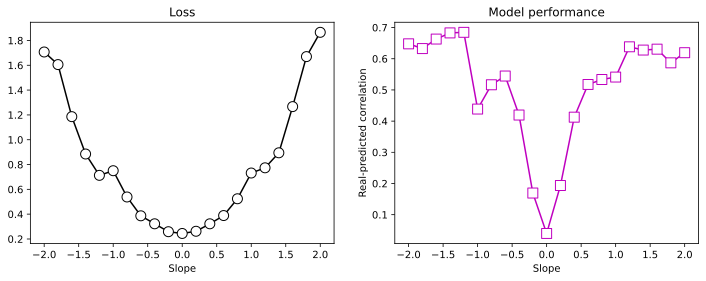

In [ ]:
# Plot the losses and accuracy (correlation of y,y^) as a fn of the slope
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()

Results are counterintuitive , at slope 0 , the losses are least yet model performance is worst and as slope increases , losses also increase but model performance also improves.

#**ANN for binary classification ahead , not predicting numerical values .**

In [ ]:
# Import libraries
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
#from IPython import display
#display.set_matplotlib_formats('svg')

In [ ]:
# Creating Data
nPerClust =100
blur = 1 # How spread out the data is

A= [1,1]
B= [5,1]

# generate data
a= [A[0]+np.random.randn(nPerClust)*blur,A[1]+np.random.randn(nPerClust)*blur]
b= [B[0]+np.random.randn(nPerClust)*blur,B[1]+np.random.randn(nPerClust)*blur]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concentrate into a matrix
data_np = np.hstack((a,b)).T

# convert to pytorch tensors
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()


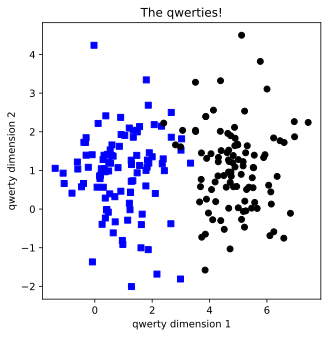

In [ ]:
# Visualizing the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [ ]:
#   # Model Building

ANN_Classification = nn.Sequential(
    nn.Linear(2,1), # Input Layer (2 input features , x coordinates and y coordinates , 2D data)
    nn.ReLU(), # Activation unit
    nn.Linear(1,1), # Output Unit
    nn.Sigmoid() # final Activation Unit ()
)
ANN_Classification


Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [ ]:
# Setting MetaParameters

learningRate = .01

# Loss Function
loss_fn = nn.BCELoss()
# Because this is classification task and not regression tsk, Binary Cross Entropy (BCE) is used here instead of MSE


# Optimizer (Grad desc)
optimizer = torch.optim.SGD(ANN_Classification.parameters(), lr = learningRate)

In [ ]:
# Training

# Setting Epochs
training_epochs = 1000

# Will Store Losses
losses = torch.zeros(training_epochs)

# Training
for i in range(training_epochs):

  # Forward Pass
  Output = ANN_Classification(data)

  # Computing losses
  loss = loss_fn(Output, labels)
  losses[i] = loss

  # Backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

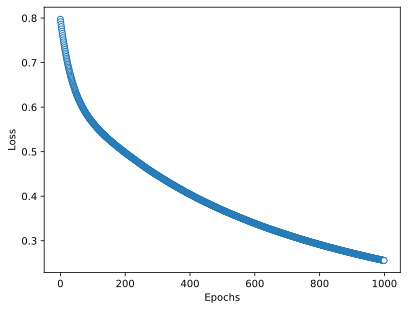

In [ ]:
# Visualize loss

plt.plot(losses.detach(),'o',markerfacecolor='w', linewidth = .1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Compute the predictions
predictions = ANN_Classification(data)

# Converting the numeric output to Labels
output_labels = predictions>.5 # Binary classification of outputs (visualize sigmoid and its output)


# Errors
misclassified = np.where(output_labels!=labels)[0]

# Accuracy
accuracy = 100 - 100*len(misclassified)/(2*nPerClust)

f"{accuracy}%"



'93.0%'

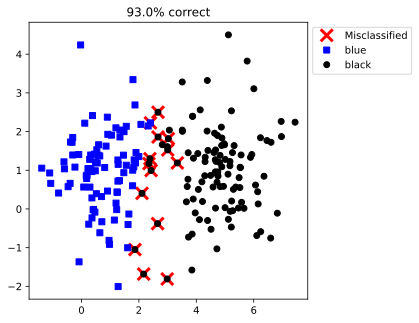

In [ ]:
# Visualizing
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~output_labels)[0],0],data[np.where(~output_labels)[0],1],'bs')
plt.plot(data[np.where(output_labels)[0],0] ,data[np.where(output_labels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{accuracy}% correct')
plt.show()

Learning Rate Comparison

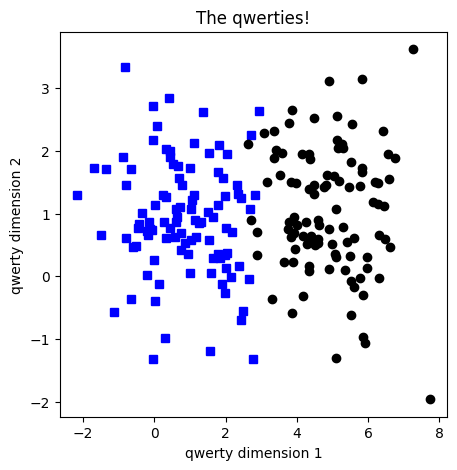

In [73]:
# Import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
#from IPython import display
#display.set_matplotlib_formats('svg')

# Creating Data
nPerClust =100
blur = 1 # How spread out the data is

A= [1,1]
B= [5,1]

# generate data
a= [A[0]+np.random.randn(nPerClust)*blur,A[1]+np.random.randn(nPerClust)*blur]
b= [B[0]+np.random.randn(nPerClust)*blur,B[1]+np.random.randn(nPerClust)*blur]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concentrate into a matrix
data_np = np.hstack((a,b)).T

# convert to pytorch tensors
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# Visualizing the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()


In [74]:
def createANNmodel(learningRate):

  # model architecture
  ANNclassify = nn.Sequential(
      nn.Linear(2,1),   # input layer
      nn.ReLU(),        # activation unit
      nn.Linear(1,1),   # output unit
      #nn.Sigmoid(),    # final activation unit (not needed b/c we use BCEWithLogitsLoss)
        )

  # loss function
  lossfun = nn.BCEWithLogitsLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

  # model output
  return ANNclassify,lossfun,optimizer


In [76]:
def trainTheModel(ANNmodel):

  # initialize losses
  losses = torch.zeros(numepochs)

  # loop over epochs
  for epochi in range(numepochs):

    # forward pass
    yHat = ANNmodel(data)

    # compute loss
    loss = lossfun(yHat,labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



  # final forward pass
  predictions = ANNmodel(data)

  # compute the predictions and report accuracy
  # NOTE: shouldn't it be predictions>.5??
  totalacc = 100*torch.mean(((predictions>0) == labels).float())
  # It is 0 because the Sigmoid activation fn is commented out and our output is between -1 to 1

  return losses,predictions,totalacc

Testing

Final accuracy: 50%


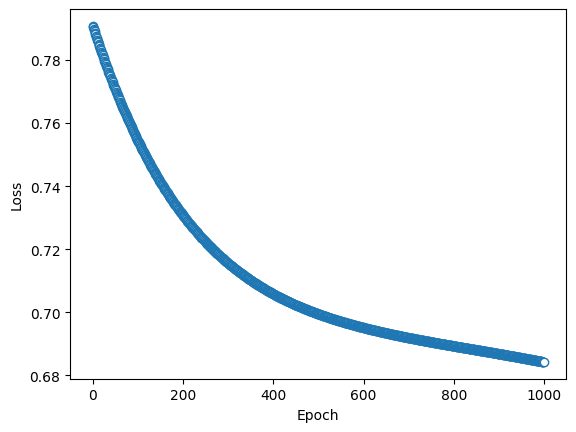

In [77]:


# create everything
ANNclassify,lossfun,optimizer = createANNmodel(.01)

# run it
losses,predictions,totalacc = trainTheModel(ANNclassify)

# report accuracy
print('Final accuracy: %g%%' %totalacc)


# show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

# Experiments **Now**

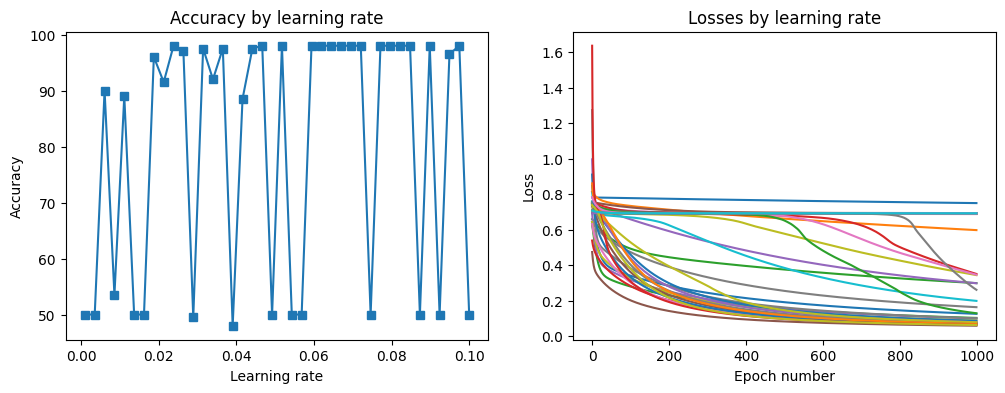

In [78]:


# the set of learning rates to test
learningrates = np.linspace(.001,.1,40)

# initialize results output
accByLR = []
allLosses = np.zeros((len(learningrates),numepochs))


# loop through learning rates
for i,lr in enumerate(learningrates):

  # create and run the model
  ANNclassify,lossfun,optimizer = createANNmodel(lr)
  losses,predictions,totalacc = trainTheModel(ANNclassify)

  # store the results
  accByLR.append(totalacc)
  allLosses[i,:] = losses.detach().numpy()



# plot the results
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()



# **Multi Layer Perceptron**
Read everything from top to bottom to understand logic of data generation and all the Required Logic , explains 60% of what is being tought

In [62]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
#from IPython import display
#display.set_matplotlib_formats('svg')

In [63]:
# Creating Data

# Number of points per Cluster
nPerClust = 100

# The Spread of the data scale wise
blur = 1

# Setting Centroids of these Clusters
A = [2,3]
B = [1,-2]

# Generating Data
# Choosing coordinates of centroids , adding a random number to them multiplyed to blur
''' what is happening here
    a = [[array_of_x_coordinates_of_first_cluster] , [array_of_y_coordinates_of_first_cluster]]
    same for b '''
a = [A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur]

# True Labels
# Arranging two column arrays vertically: first 100 zeros (cluster A), then 100 ones (cluster B)
# np.vstack creates shape (200,1) column vector
''' [0,0,0,0,....0,1,1,1,1,....1]'''
true_labels = np.vstack((np.zeros((nPerClust , 1)),np.ones((nPerClust , 1))))


# np.hstack((a,b)) concatenates: a[0] and b[0] for all x-coords, a[1] and b[1] for all y-coords and stores them as [[x.......],[y......]]
# Creates two (1,200) arrays; .T maps each x to corresponding y → (200,2) data points
data_np = np.hstack((a,b)).T
# Now data_np = [[x1,y1], [x2,y2], ...] where first 100 points from cluster A, next 100 from B

# Now we convert this data from Numpy objects to Pytorch tensors
data = torch.tensor(data_np).float()
lables = torch.tensor(true_labels).float()




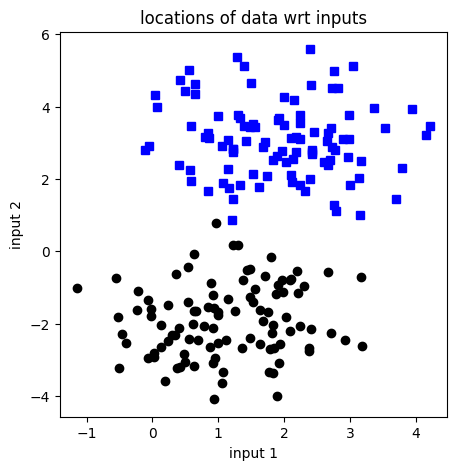

In [64]:
#visualizing

# Defining pixel size of the plotted figure
fig = plt.figure(figsize=(5,5))

# here np.where(labels==0) identifies the indices of the points where label is 0 in the labels matrix ,
# It returns a tuple of arrays, where each array contains the indices along a specific dimension where the condition is true

# [0]: This accesses the first element of the tuple returned by np.
# and the ,0 and ,1 indicates the x and y axis of the datapoints
plt.plot(data[np.where(lables==0)[0],0],data[np.where(lables==0)[0],1],'bs') # bs makes blue squares
plt.plot(data[np.where(lables==1)[0],0],data[np.where(lables==1)[0],1],'ko') # ko makes black circles

plt.xlabel('input 1')
plt.ylabel('input 2')
plt.title('locations of data wrt inputs')
plt.show()


Functions for Model and Training

In [65]:
# Defining function for Model , the structure of the multi layer perceptron
def Model(learning_rate):

  # Building the Model [Architecture]

  ANNmultilayer = nn.Sequential(
      # Linear fns and Non Linear activation fns come in pairs
      # Number of output features of current layer should match the Number of input features of next layer

      nn.Linear(2,16), # Input Layer - Taking 2 Inputs and gives 16 outputs
      # nn.ReLU(), # Takes the 16 inputs and maps them to a smaller range (activation fn)v- in linear problems , not needed and performs better

      nn.Linear(16,1), # Hidden Layer - Takes the 16 inputs and gives 1 output
      # nn.ReLU(), # Maps the output of the Hidden layer to smaller range (activation fn) - in linear   ''       ''     ''       ''       ''

      nn.Linear(1,1), # Output Layer - Gives end outputs
      nn.Sigmoid() # Final activation fn for final output

  )

  # Loss Function - Binary Cross Entropy -> Good with Classification tasks
  loss_fn = nn.BCELoss() # BCEWithLogitsLoss() is better to use and also does not require sigmoid in the model

  # Optimizer - Gradient Descent
  optimizer = torch.optim.SGD(ANNmultilayer.parameters(), lr = learning_rate)


  # Outputs of the model
  return ANNmultilayer,loss_fn,optimizer

In [66]:
# Model Training functions

# Fixed Parameter
numepochs = 1000

def model_training(Model_to_train):

  # Initializing Losses
  'initializing with 0s , total number of iterations to store loss after each iteration '
  losses = torch.zeros(numepochs)

  # Training

  # iterating
  for epochi in range(numepochs):

    # Forward Pass (Predicting with randomized)
    'passing all the input points into the model to get a predicted output'
    output = Model_to_train(data)

    # Computing Losses
    'using loss function to calculate the loss'
    loss = loss_fn(output,lables)
    'Storing the losses'
    losses[epochi] = loss

    # Backpropogation - Grad desc
    '''PyTorch, by default, accumulates gradients. When loss.backward() is called, the gradients
    computed for the current batch are added to the existing .grad attributes of the model's parameters.
    If optimizer.zero_grad() is not called before each new batch, the gradients would continuously
    accumulate from previous batches, leading to incorrect and potentially misleading updates during optimizer.step()'''
    optimizer.zero_grad()

    'loss.backward() initiates the backpropagation process.'
    loss.backward()

    '''optimizer.step() then uses these calculated gradients and the specific optimization algorithm defined by the optimizer
    (e.g., SGD, Adam, RMSprop) to adjust the values of the model's parameters'''
    optimizer.step()

  # Final forward pass
  predictions = Model_to_train(data)

  # Finding Accuracy
  'necessary to see that here 0.5 is used instead of 0 , because we used Sigmoid in the end'
  totalacc = 100*torch.mean(((predictions>.5) == lables).float())


  return losses,predictions,totalacc






# Testing

Final accuracy: 99.5%


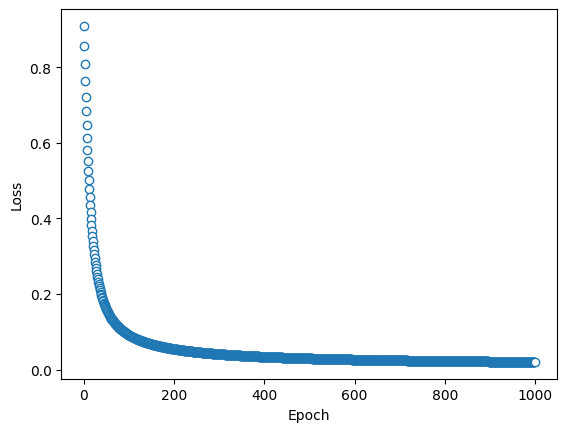

In [67]:
# Creating Everything
model , loss_fn , optimizer = Model(.01)

# Run Model training
losses,predictions,totalacc = model_training(model)

# Report Accuracy
print('Final accuracy: %g%%' %totalacc)



# Visualizing

'losses.detatch() to just keep numerical info , "o" is for circle marks and basic info'
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()



# REAL Experiment , varying learning rates

In [68]:
# Learning Rates
'making an array of linearly spaced 50 elements between 0.001 and 1'
learningRates = np.linspace(.001,.1,50)

# Initializing Stuff

'To track model accuracies'
accuracy_by_learningrate = []

'to track losses accross all accuracies'
all_losses = np.zeros((len(learningRates),numepochs))

# Looping
for i,lr in enumerate(learningRates):

  # Creating and running the model
  model , loss_fn , optimizer = Model(lr)
  losses,predictions,totalacc = model_training(model)

  # Storing Results
  accuracy_by_learningrate.append(totalacc)
  all_losses[i,:] = losses.detach().numpy()



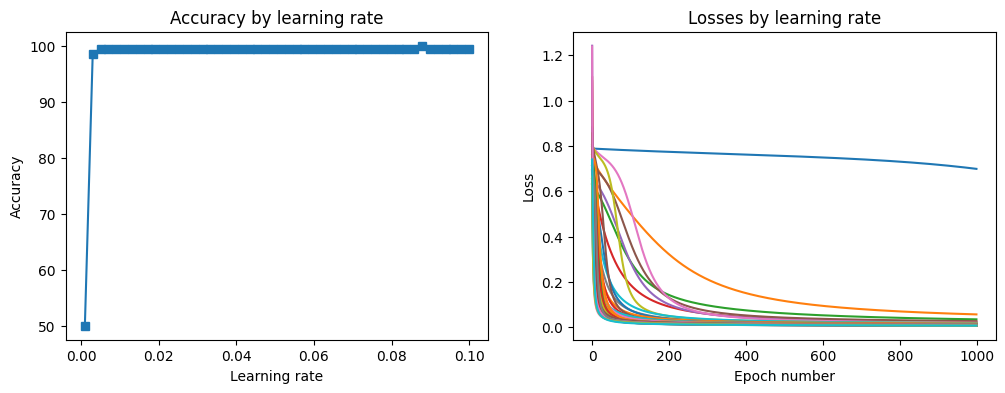

In [79]:
# Plotting
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningRates,accuracy_by_learningrate,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(all_losses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

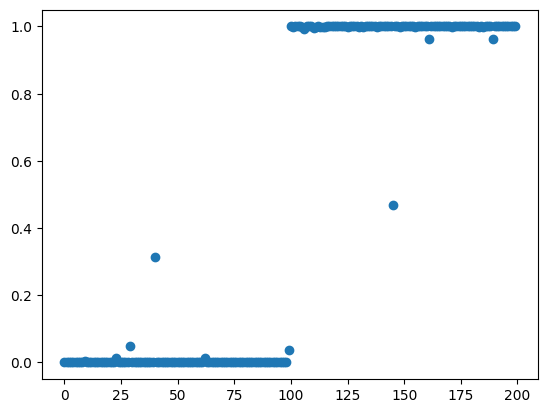

In [71]:
# Discussing the total accuracy
'totalacc = 100*torch.mean(((predictions>.5) == lables).float())'

plt.plot(predictions.detach(),'o')

# here predictions> 0.5 will represint a boolean or 0/1 , and labels are 0/1 , therefore we compare the predictions with labels
# hence true will be correct guesses and fale will be incorrect guessesf
# then we convert the true and false into float() in the form of 1. and 0.
# then we find the mean of all the predictions , and 100 will make it percentage

# Iris Dataset

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch


In [ ]:
# Load iris dataset (comes with seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


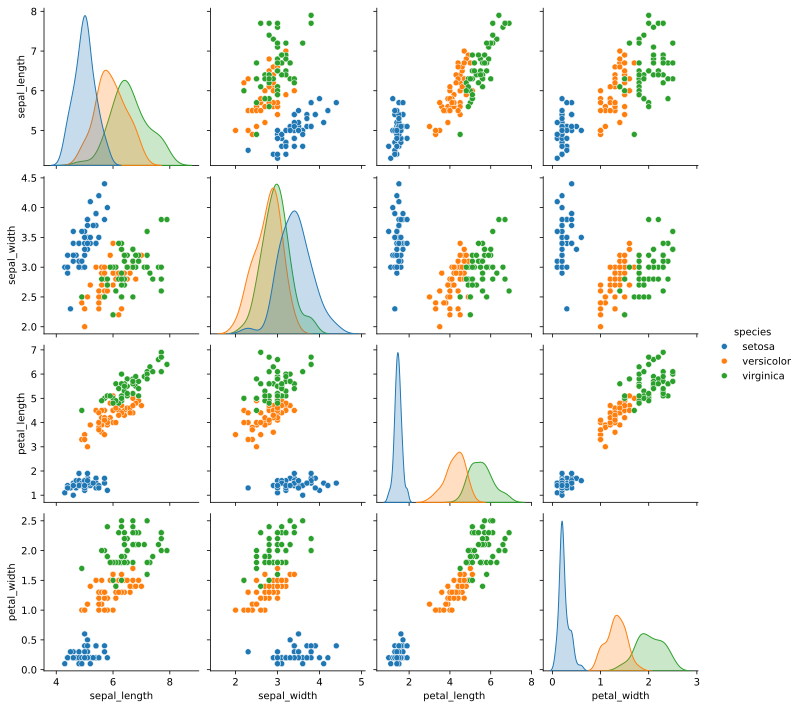

In [ ]:
# Plot to show data using seaborn
sns.pairplot(iris, hue='species')
plt.show()

In [ ]:
# Organizing the data

# Convert from pandas dataframe to tensor
'here we take first 4 columns because the final column is the output'
data = torch.tensor(iris[iris.columns[0:4]].values).float()


# Converting Species to a number
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species=='setosa'] = 0
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

# Creating **ANN**

Final accuracy: 98%


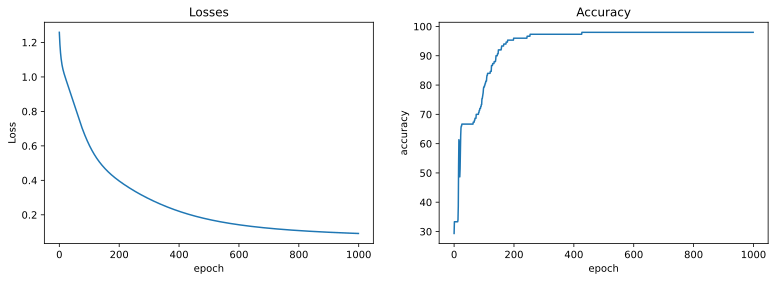

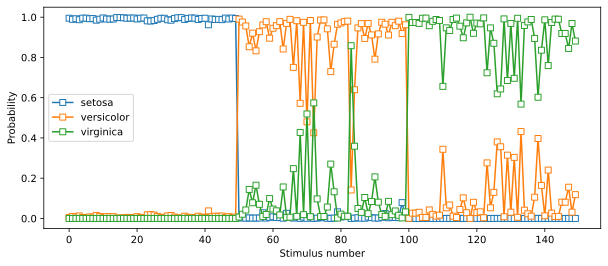

In [ ]:
# Model Architecture
ANNiris = nn.Sequential(
    nn.Linear(4,64), # Input Layer
    nn.ReLU(), # Activation
    nn.Linear(64,64), # Hidden Layer
    nn.ReLU(), # Activation
    nn.Linear(64,3) # Output Layer
)

# Loss Function
lossfun = nn.CrossEntropyLoss() # Classification Tasks - combines Softmax into loss function

# Optimizer
optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)


# initialize losses

numepochs = 1000
losses = torch.zeros(numepochs)
ongoingAcc = []



# loop over epochs
for epochi in range(numepochs):

  # forward pass
  yHat = ANNiris(data)

  # compute loss
  loss = lossfun(yHat,labels)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  matches = torch.argmax(yHat,axis=1) == labels # booleans (false/true)
  matchesNumeric = matches.float()              # convert to numbers (0/1)
  accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100
  ongoingAcc.append( accuracyPct )              # add to list of accuracies


  # final forward pass
predictions = ANNiris(data)

predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())


torch.argmax(yHat,axis=1)


# Visualize


# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()
# run training again to see whether this performance is consistent


# confirm that all model predictions sum to 1, but only when converted to softmax
sm = nn.Softmax(1)
torch.sum(sm(yHat),axis=1)


# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

plt.plot(sm(yHat.detach()),'s-',markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['setosa','versicolor','virginica'])
plt.show()






# Code Challenge

torch.Size([300, 1])


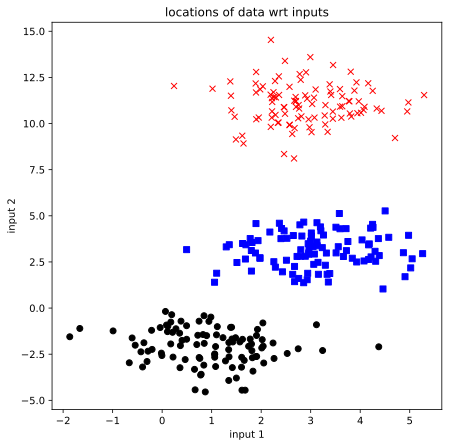

In [ ]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch



# Creating Data

# Number of points per Cluster
nPerClust = 100

# The Spread of the data scale wise
blur = 1

# Setting Centroids of these Clusters
A = [3,3]
B = [1,-2]
C = [3,11]

# Generating Data
# Choosing coordinates of centroids , adding a random number to them multiplyed to blur
''' what is happening here
    a = [[array_of_x_coordinates_of_first_cluster] , [array_of_y_coordinates_of_first_cluster]]
    same for b '''
a = [A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur]
c = [C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur]

# True Labels
# Arranging two column arrays vertically: first 100 zeros (cluster A), then 100 ones (cluster B)
# np.vstack creates shape (200,1) column vector
''' [0,0,0,0,....0,1,1,1,1,...2,2,2,2]'''
true_labels = np.vstack((np.zeros((nPerClust , 1)),np.ones((nPerClust , 1)),np.full((nPerClust, 1), 2)))


# np.hstack((a,b)) concatenates: a[0] and b[0] for all x-coords, a[1] and b[1] for all y-coords and stores them as [[x.......],[y......]]

data_np = np.hstack((a,b,c)).T

# Now we convert this data from Numpy objects to Pytorch tensors
data = torch.tensor(data_np).float()
lables = torch.tensor(true_labels).float()
print(lables.shape)


#visualizing

# Defining pixel size of the plotted figure
fig = plt.figure(figsize=(7,7))

# here np.where(labels==0) identifies the indices of the points where label is 0 in the labels matrix ,
# It returns a tuple of arrays, where each array contains the indices along a specific dimension where the condition is true

# [0]: This accesses the first element of the tuple returned by np.
# and the ,0 and ,1 indicates the x and y axis of the datapoints
plt.plot(data[np.where(lables==0)[0],0],data[np.where(lables==0)[0],1],'bs') # bs makes blue squares
plt.plot(data[np.where(lables==1)[0],0],data[np.where(lables==1)[0],1],'ko') # ko makes black circles
plt.plot(data[np.where(lables==2)[0],0],data[np.where(lables==2)[0],1],'rx')

plt.xlabel('input 1')
plt.ylabel('input 2')
plt.title('locations of data wrt inputs')
plt.show()



In [ ]:
import torch
import torch.nn as nn

# --- 1. Model Definition ---
ANN_three = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    # NOTE: No Softmax here because nn.CrossEntropyLoss applies LogSoftmax internally.
    # Adding it here would result in softmax on softmax and degrade performance.
)

loss_fn = nn.CrossEntropyLoss() # applies softmax within
optimizer = torch.optim.SGD(ANN_three.parameters(), lr=0.01)

# --- 2. Training Setup ---
numepochs = 1000
losses = torch.zeros(numepochs)
ongoingAcc = []



for epochi in range(numepochs):

    # Forward pass
    yHat = ANN_three(data)

    # FIX & ENHANCEMENT:
    # 1. .squeeze(): Flattens labels from shape [N, 1] to [N] (Fixes RuntimeError).
    # 2. .long(): Ensures targets are integers (required for CrossEntropy).
    loss = loss_fn(yHat, lables.squeeze().long())

    # ENHANCEMENT: Use .item() to store the scalar value only.
    # Storing the full tensor (as in the original code) keeps the computational graph alive,
    # leading to memory leaks over many epochs.
    losses[epochi] = loss.item()

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # --- 3. Accuracy Calculation ---
    # ENHANCEMENT: torch.no_grad() disables gradient tracking for metrics (saves memory/compute)
    with torch.no_grad():
        # Match dimensions: compare predictions to the squeezed labels
        matches = torch.argmax(yHat, axis=1) == lables.squeeze()
        accuracyPct = 100 * torch.mean(matches.float())

        # ENHANCEMENT: Store simple float, not the tensor object
        ongoingAcc.append(accuracyPct.item())


In [ ]:
finalacc = 100*torch.mean((torch.argmax(yHat,axis=1) == lables.squeeze()).float())
print('Final accuracy: %g%%' %finalacc)

Final accuracy: 99.6667%


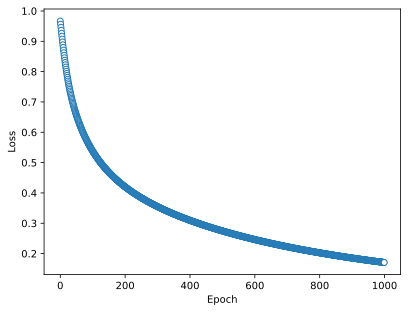

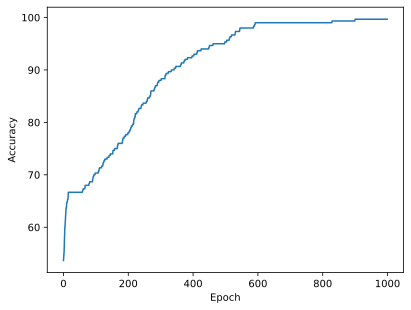

In [ ]:
# visualization
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

plt.plot(ongoingAcc)
plt.xlabel('Epoch'), plt.ylabel('Accuracy')
plt.show()



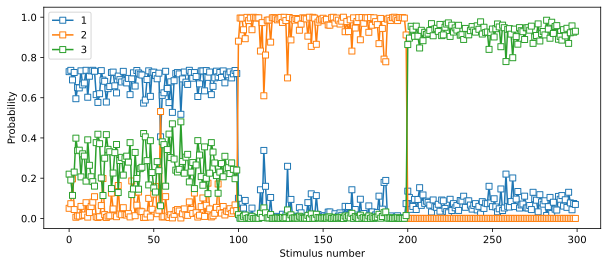

In [ ]:
# plot final
fig = plt.figure(figsize=(10,4))

plt.plot(sm(yHat.detach()),'s-',markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['1','2','3'])
plt.show()

# Comparing the Number of Hidden Units - Choosing optimal Numbers

In [ ]:
# Goal is to classify flowers using model with one hidden layer and
# parametrically changing number of hidden units from 1 to 128. plot
# classification accuracy as a function of the model size

import seaborn as sns
iris = sns.load_dataset('iris') # pandas dataframe

print(iris.head())



   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
# converting to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# Converting Species to a number
labels = torch.zeros(len(data), dtype=torch.long) # defaulting all to 0
# labels[iris.species=='setosa'] = 0 -> not needed - by default all zeroes
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

labels



tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

Creating and training model with variable hidden layer units

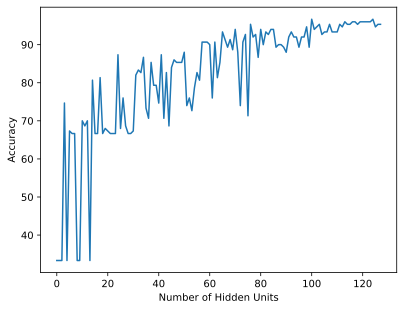

In [105]:
def create_Model(hidden_units):
  ANN_iris = nn.Sequential(
      nn.Linear(4,hidden_units), # Input layer
      nn.ReLU(),
      nn.Linear(hidden_units,hidden_units) , # Hidden Layer
      nn.ReLU(),
      nn.Linear(hidden_units,3) # Output Layer
  ) # overkill (unnecessarily increasing complexity) for this dataset but main objective is to find the relation in
  # Accuracy and hiddien Unit numbers

  loss_fn = nn.CrossEntropyLoss()

  optimizer = torch.optim.SGD(ANN_iris.parameters(),lr=.01)

  return ANN_iris , loss_fn , optimizer

def train_model(model ,numepochs = 1000):

  for epochi in range(numepochs):

    yHat = model(data)

    loss = loss_fn(yHat,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  predictions = model(data)
  predlabels = torch.argmax(predictions,axis=1)

  return 100*torch.mean((predlabels == labels).float()) # final accuracy



# Experiment
tracking_accuracy = []
for i in range(1,129):
  model , loss_fn , optimizer = create_Model(i)
  accuracy = train_model(model,150) #change epochs experimentally
  tracking_accuracy.append(accuracy)

plt.plot(tracking_accuracy)
plt.xlabel('Number of Hidden Units')
plt.ylabel('Accuracy')
plt.show()







# Depth vs Breadth  - Number of trainable parameters

In [112]:
# even with same number of nodes , a deeper network can have different number of trainable parameters than a wider network

import numpy as np
import torch
import torch.nn as nn

wide = nn.Sequential( # instance of a class
    nn.Linear(2, 4), # weight matrix that maps input layer to hidden layer
    nn.Linear(4, 3),
)

deep = nn.Sequential(
    nn.Linear(2,2),
    nn.Linear(2,2),
    nn.Linear(2,3),
)

# Peeking inside the network
from torchsummary import summary
summary(wide , input_size=(2,)) # network name and the input size
summary(deep , input_size=(2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 4]              12
            Linear-2                    [-1, 3]              15
Total params: 27
Trainable params: 27
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 2]               6
            Linear-2                    [-1, 2]               6
            Linear-3                    [-1, 3]               9
Total params: 21
Trainable params: 21
Non-trainable params: 0
-----------------------------------------------------

# Defining Neural networks with the help of CLASS instead of nn.Sequential

In [ ]:
# Using Sequential

ANN_seq = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.Sigmoid()
)

import torch.nn.functional as F # gives access to fns that would otherwise be present as classes and only be used when an instance is created

# using class

class ANN_class(nn.Module):
    def __init__(self):
        super().__init__()

        # input layer
        self.input_l = nn.Linear(2,4)
        # output layer
        self.output_l = nn.Linear(4,3)

    # forward pass
    def forward(self, x):
        # pass through input layer
        x = self.input_l(x)

        # Apply ReLU
        x = F.relu(x)

        # output layer
        x = self.output_l(x)
        x = torch.sigmoid(x)

        return x

# Experiment - Checking if the number of layers and the number of Units in each layer are interdependent and affect accuracy

In [2]:
import seaborn as sns
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

In [3]:
iris = sns.load_dataset('iris')
data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [11]:
class ANN_check(nn.Module):

  # initializing
  def __init__(self,num_layers,num_units_per_layer):
    super().__init__()

    # initializing dictionary to store layers
    self.layers = nn.ModuleDict()
    self.units = num_units_per_layer
    self.num_layers = num_layers

    # input layer
    self.layers['input'] = nn.Linear(4,self.units)


    for i in range(num_layers):
      # hidden layers
      self.layers[f'hidden {i}'] = nn.Linear(self.units,self.units)

    # output layer
    self.layers['output'] = nn.Linear(self.units,3)


  # forward pass
  def forward(self,x):
    # pass through input layer
    x = self.layers['input'](x)

    # non linear
    x = F.relu(x)

    for i in range(self.num_layers):
      # hidden layers
      x = self.layers[f'hidden {i}'](x)
      x = F.relu(x)

    # output layer
    x = self.layers['output'](x)

    return x


In [16]:
# generating an instance to check if there are any python errors and the shape is correct
units_per_layer = 12
layers = 4
network = ANN_check(layers,units_per_layer)

# generating random data to check
fake = torch.randn(10,4) # 10 samples 4 dimensions

y = network(fake)

print(y)

tensor([[ 0.0299, -0.0987, -0.2710],
        [ 0.0309, -0.0987, -0.2738],
        [ 0.0297, -0.0986, -0.2705],
        [ 0.0303, -0.0986, -0.2718],
        [ 0.0281, -0.0989, -0.2677],
        [ 0.0290, -0.0988, -0.2698],
        [ 0.0288, -0.0991, -0.2693],
        [ 0.0297, -0.0987, -0.2704],
        [ 0.0305, -0.0986, -0.2724],
        [ 0.0305, -0.0987, -0.2725]], grad_fn=<AddmmBackward0>)


Function to train the model

In [24]:
def training_model(model,numepochs = 120):


  loss_fn = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters() , lr = 0.01)

  for i in range(numepochs):

    training_output = model(data)

    loss = loss_fn(training_output,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  output = model(data)
  predicted =torch.argmax(output,axis=1)
  final_pass_accuracy = 100*torch.mean((predicted == labels).float())

  parameters_numbers = sum(p.numel() for p in model.parameters() if p.requires_grad)

  return final_pass_accuracy , parameters_numbers



In [25]:
# testing the function
acc = training_model(ANN_check(4,12))
print(acc) # gives a touple

(tensor(33.3333), 723)


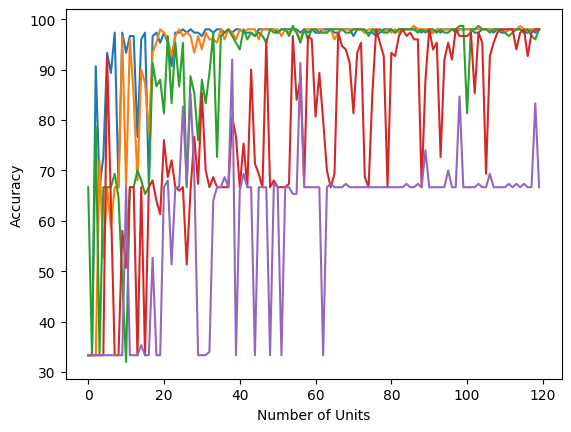

In [29]:
# Experiment
epochs = 500

layers = 5
units = 120


for layer in range(1 , layers + 1):
  accuracy_wrt_layer = []
  for unit in range(1 , units + 1):

    # checks for 'layer' number of layers
    model = ANN_check(layer,unit)
    accuracy , parameters = training_model(model,epochs)
    accuracy_wrt_layer.append(accuracy)
  plt.plot(accuracy_wrt_layer)
  plt.xlabel('Number of Units')
  plt.ylabel('Accuracy')
  # color - layers -> depth
  # Blue - 1 , Orange -2 , Green - 3 , Red - 4 , Purple - 5

  # in this case more depth is not benificial for the model but highter number of units work well




Challenge - convert sequential to class

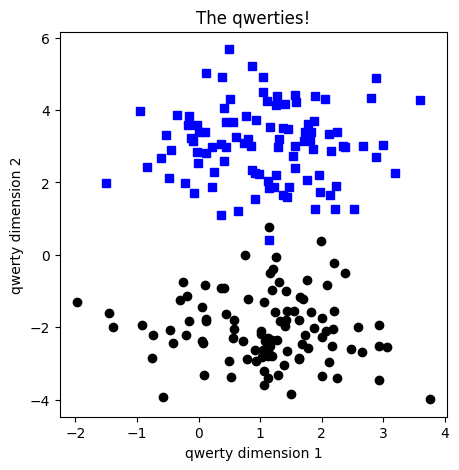

In [30]:


# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np


# create data

nPerClust = 100
blur = 1

A = [  1,  3 ]
B = [  1, -2 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()



In [45]:
class ANN_conversion(nn.Module):

  def __init__(self):
    super().__init__() # inheritance

    self.input_layer = nn.Linear(2,16)
    self.hidden_layer = nn.Linear(16,1)
    self.output_layer = nn.Linear(1,1)

  def forward(self,x): # we take x as input , x is the data

    x = self.input_layer(x)

    x = F.relu(x)

    x = self.hidden_layer(x)

    x = F.relu(x)

    x = self.output_layer(x)

    x = torch.sigmoid(x)

    return x # here x is the output generated by passing training data from each layer




def model_training(model , numepochs = 1000):

  # loss function
  lossfun = nn.BCELoss() # but better to use BCEWithLogitsLoss

  # optimizer
  optimizer = torch.optim.SGD(model.parameters(),lr=0.01)


    # initialize losses
  losses = torch.zeros(numepochs)

  # loop over epochs
  for epochi in range(numepochs):

    # forward pass
    yHat = model(data)

    # compute loss
    loss = lossfun(yHat,labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # final forward pass
  predictions = model(data)

  return losses , predictions





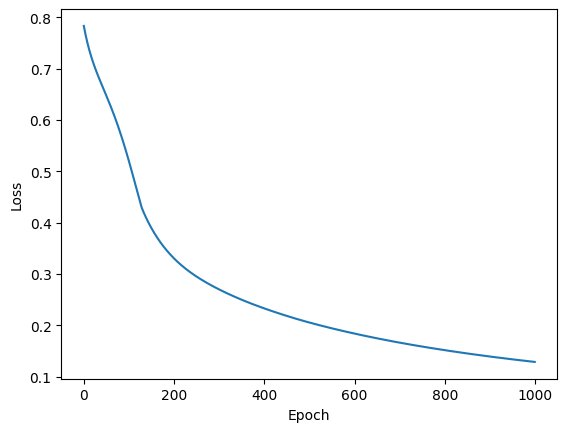

In [58]:
model = ANN_conversion()
losses , predictions = model_training(model)

plt.plot(losses.detach())
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
